In [254]:
import numpy as np                   # for multi-dimensional containers
import pandas as pd       # for DataFrame
import json
import platypus as plat              # multi-objective optimisation framework
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter
import pygmo as pg
from pprint import pprint

In [255]:
#
# BEGIN HELPER FUNCTIONS
#

In [256]:
def percentage_change(data):
    per_change = []
    for i in range(1, len(data)):
        per_change.append( ((data[i] - data[i-1]) / data[i-1]) * 100)
    return per_change

In [257]:
def avg_gen_spar(df):
    gen_avg = []
    gen_spar_df = df.filter(["gen0-sparsity", "gen1-sparsity", "gen2-sparsity", "gen3-sparsity", "gen4-sparsity", "gen5-sparsity"])
    for gen in gen_spar_df:
        gen_avg.append(float(np.mean(gen_spar_df[gen])))
    return gen_avg

In [258]:
# front must represented a a 2d matrix
def front_hv(front):
    inver = [] # make all objective cost negative
    for row in front:
        temp_row = []
        for val in row:
            temp_row.append(-val)
    inver.append(temp_row)
    
    ref = [0] * len(front[0]) # always use reference point {0, 0, ..., 0}
    hv = pg.hypervolume(inver) #initialize hypervolume object
    # Sometimes the front is too small to use 
    try: 
        h = hv.compute(ref)
    except ValueError:
        print("no good ref point for: ")
        h = 0
        print(front)
    return h

In [282]:
def avg_gen_hv(df):
    gen_avg = []
    gen_front_df = df.filter(["gen0-front", "gen1-front", "gen2-front", "gen3-front", "gen4-front", "gen5-front"])
    for gen in gen_front_df:
        print(gen)
        gen_hv = []
        for front in gen_front_df[gen].tolist():
            pprint(front)
            gen_hv.append(front_hv(front))
        gen_avg.append(float(np.mean(gen_hv)))
    return gen_avg
[1311, 687967, 905049, 1045260.0],
 [1317, 687924, 905121, 1045330.0],
 [1575, 829639, 868224, 1486120.0],
 [966, 1132370.0, 1043080.0, 2189060.0],
 [1311, 687967, 905049, 1045260.0],
 [966, 1132370.0, 1043080.0, 2189060.0]]

In [284]:
avg_gen_hv(UNCAPPED_COMBINED_BORDA_BAY)

gen0-front
[[966, 1132370.0, 1043080.0, 2189060.0],
 [1317, 687924, 905121, 1045330.0],
 [1575, 829639, 868224, 1486120.0],
 [1311, 687967, 905049, 1045260.0]]
[[685, 2852740.0, 2601990.0, 5586020.0],
 [1221, 1042780.0, 1202310.0, 1793550.0],
 [1199, 1120310.0, 1180150.0, 2008870.0],
 [1524, 1069160.0, 1429060.0, 1638590.0]]
[[1167, 2844190.0, 2581070.0, 5586300.0],
 [1362, 639385, 884506, 958194],
 [1437, 712238, 849366, 1193600.0],
 [1350, 642668, 887134, 955186]]
[[840, 703274, 691545, 1331730.0],
 [999, 448126, 589699, 688738],
 [1014, 539788, 541676, 1000620.0],
 [999, 448126, 589699, 688738]]
[[1003, 4856290.0, 4338740.0, 9433680.0],
 [2094, 1359740.0, 1709760.0, 2191450.0],
 [2595, 1638890.0, 1657350.0, 3011950.0],
 [2376, 1373810.0, 1810440.0, 2128050.0]]
[[873, 774693, 815472, 1405690.0],
 [1011, 572795, 778401, 833194],
 [1086, 679826, 728483, 1203690.0],
 [1077, 575256, 788969, 826929]]
[[639, 2755100.0, 2586980.0, 5367220.0],
 [1527, 1340350.0, 1555460.0, 2313670.0],
 [1509

[3.413494982358037e+21,
 3.2267406251380085e+22,
 3.22676636005421e+22,
 3.22676636005421e+22,
 3.22676636005421e+22,
 3.22676636005421e+22]

In [260]:
#
# END HELPER FUNCTION
#

In [261]:
# MAP information (node & edge count)
map_df = pd.json_normalize(json.load(open("dao-map-info.json"))["data"])
map_df
unique_nodes = map_df["nodes"].unique()
unique_edges = map_df["edges"].unique()
COL = [435666, 1057066]
BAY = [321270, 800172]
NY = [264346, 733846]
FLA = [1070376, 2712798]

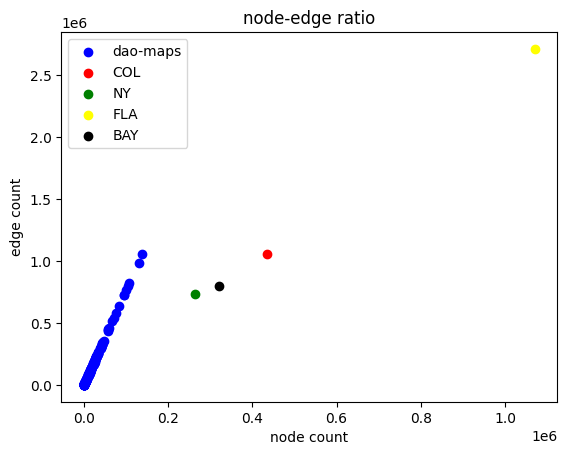

In [262]:
plt.scatter(unique_nodes, unique_edges, c = "blue", label = "dao-maps")
plt.scatter(COL[0], COL[1], c = "red", label = "COL")
plt.scatter(NY[0], NY[1], c = "green", label = "NY")
plt.scatter(FLA[0], FLA[1], c = "yellow", label = "FLA")
plt.scatter(BAY[0], BAY[1], c = "black", label = "BAY")
plt.xlabel("node count")
plt.ylabel("edge count")
plt.legend()
plt.title("node-edge ratio")
plt.show()

In [263]:
UNCAPPED_COMBINED_BORDA_NY = pd.json_normalize(json.load(open("road/NY-borda-combined-uncap.json"))["data"])
UNCAPPED_COMBINED_BORDA_BAY = pd.json_normalize(json.load(open("road/BAY-borda-combined-uncap.json"))["data"])
UNCAPPED_COMBINED_BORDA_COL = pd.json_normalize(json.load(open("road/COL-borda-combined-uncap.json"))["data"])
UNCAPPED_COMBINED_BORDA_FLA = pd.json_normalize(json.load(open("road/FLA-borda-combined-uncap.json"))["data"])

UNCAPPED_CONSCIOUS_BORDA_NY = pd.json_normalize(json.load(open("road/NY-borda-conscious-uncap.json"))["data"])
UNCAPPED_CONSCIOUS_BORDA_BAY = pd.json_normalize(json.load(open("road/BAY-borda-conscious-uncap.json"))["data"])
UNCAPPED_CONSCIOUS_BORDA_COL = pd.json_normalize(json.load(open("road/COL-borda-conscious-uncap.json"))["data"])
UNCAPPED_CONSCIOUS_BORDA_FLA = pd.json_normalize(json.load(open("road/FLA-borda-conscious-uncap.json"))["data"])

In [264]:
UNCAPPED_COMBINED_RANGE_NY = pd.json_normalize(json.load(open("road/NY-range-combined-uncap.json"))["data"])
UNCAPPED_COMBINED_RANGE_BAY = pd.json_normalize(json.load(open("road/BAY-range-combined-uncap.json"))["data"])
UNCAPPED_COMBINED_RANGE_COL = pd.json_normalize(json.load(open("road/COL-range-combined-uncap.json"))["data"])
UNCAPPED_COMBINED_RANGE_FLA = pd.json_normalize(json.load(open("road/FLA-range-combined-uncap.json"))["data"])

UNCAPPED_CONSCIOUS_RANGE_NY = pd.json_normalize(json.load(open("road/NY-range-conscious-uncap.json"))["data"])
UNCAPPED_CONSCIOUS_RANGE_BAY = pd.json_normalize(json.load(open("road/BAY-range-conscious-uncap.json"))["data"])
UNCAPPED_CONSCIOUS_RANGE_COL = pd.json_normalize(json.load(open("road/COL-range-conscious-uncap.json"))["data"])
UNCAPPED_CONSCIOUS_RANGE_FLA = pd.json_normalize(json.load(open("road/FLA-range-conscious-uncap.json"))["data"])

In [265]:
#
# Sparsity
#

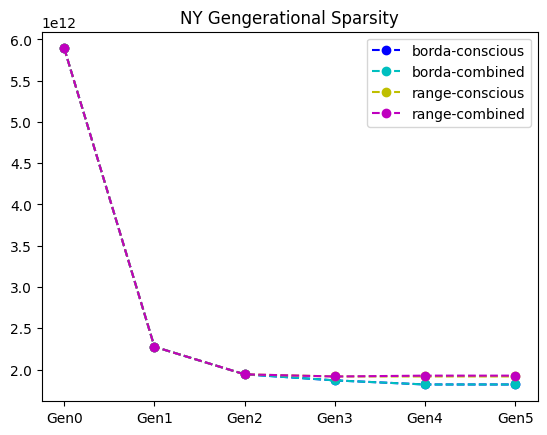

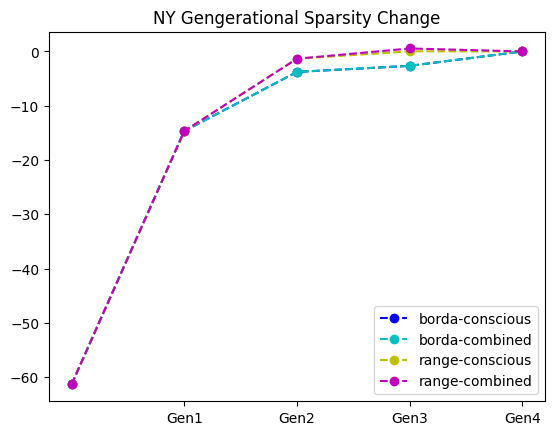

In [266]:
uncap_con_borda_spar = avg_gen_spar(UNCAPPED_CONSCIOUS_BORDA_NY)
uncap_com_borda_spar = avg_gen_spar(UNCAPPED_COMBINED_BORDA_NY)

uncap_con_range_spar = avg_gen_spar(UNCAPPED_CONSCIOUS_RANGE_NY)
uncap_com_range_spar = avg_gen_spar(UNCAPPED_COMBINED_RANGE_NY)

fig, ax = plt.subplots()
x = [0,1,2,3,4,5]
x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)

y = uncap_con_borda_spar
ax.plot(y, '--bo', label='borda-conscious')

y = uncap_com_borda_spar
ax.plot(y, '--co', label='borda-combined')

y = uncap_con_range_spar
ax.plot(y, '--yo', label='range-conscious')

y = uncap_com_range_spar
ax.plot(y, '--mo', label='range-combined')

plt.title("NY Gengerational Sparsity")
plt.legend()
plt.show()

uncap_con_borda_spar_diff = percentage_change(uncap_con_borda_spar)
uncap_com_borda_spar_diff = percentage_change(uncap_com_borda_spar)

uncap_con_range_spar_diff = percentage_change(uncap_con_range_spar)
uncap_com_range_spar_diff = percentage_change(uncap_com_range_spar)

fig, ax = plt.subplots()
x = [1,2,3,4,5]
x_ticks = ["Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)

y = uncap_con_borda_spar_diff
ax.plot(y, '--bo', label='borda-conscious')

y = uncap_com_borda_spar_diff
ax.plot(y, '--co', label='borda-combined')

y = uncap_con_range_spar_diff
ax.plot(y, '--yo', label='range-conscious')

y = uncap_com_range_spar_diff
ax.plot(y, '--mo', label='range-combined')

plt.title("NY Gengerational Sparsity Change")
plt.legend()
plt.show()

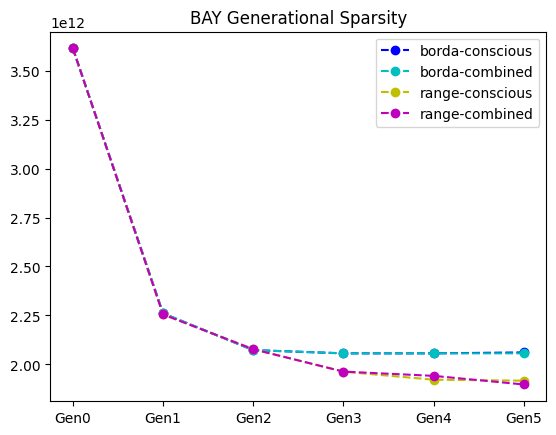

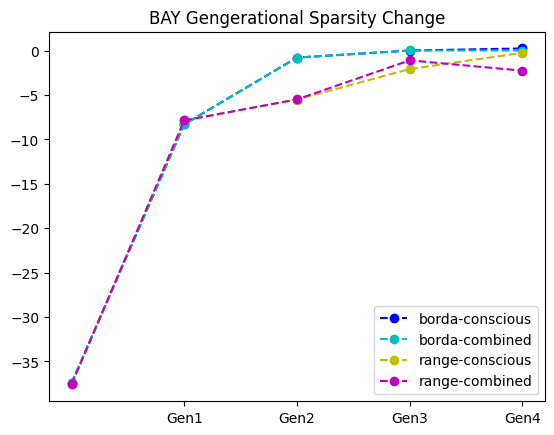

In [267]:
uncap_con_borda_spar = avg_gen_spar(UNCAPPED_CONSCIOUS_BORDA_BAY)
uncap_com_borda_spar = avg_gen_spar(UNCAPPED_COMBINED_BORDA_BAY)

uncap_con_range_spar = avg_gen_spar(UNCAPPED_CONSCIOUS_RANGE_BAY)
uncap_com_range_spar = avg_gen_spar(UNCAPPED_COMBINED_RANGE_BAY)

fig, ax = plt.subplots()
x = [0,1,2,3,4,5]
x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)

y = uncap_con_borda_spar
ax.plot(y, '--bo', label='borda-conscious')

y = uncap_com_borda_spar
ax.plot(y, '--co', label='borda-combined')

y = uncap_con_range_spar
ax.plot(y, '--yo', label='range-conscious')

y = uncap_com_range_spar
ax.plot(y, '--mo', label='range-combined')

plt.title("BAY Generational Sparsity")
plt.legend()
plt.show()

uncap_con_borda_spar_diff = percentage_change(uncap_con_borda_spar)
uncap_com_borda_spar_diff = percentage_change(uncap_com_borda_spar)

uncap_con_range_spar_diff = percentage_change(uncap_con_range_spar)
uncap_com_range_spar_diff = percentage_change(uncap_com_range_spar)

fig, ax = plt.subplots()
x = [1,2,3,4,5]
x_ticks = ["Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)

y = uncap_con_borda_spar_diff
ax.plot(y, '--bo', label='borda-conscious')

y = uncap_com_borda_spar_diff
ax.plot(y, '--co', label='borda-combined')

y = uncap_con_range_spar_diff
ax.plot(y, '--yo', label='range-conscious')

y = uncap_com_range_spar_diff
ax.plot(y, '--mo', label='range-combined')


plt.title("BAY Gengerational Sparsity Change")
plt.legend()
plt.show()

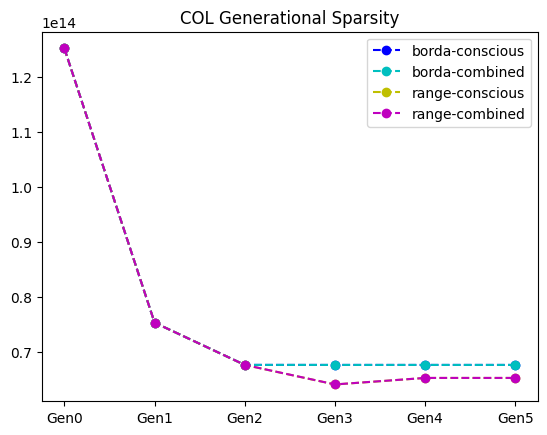

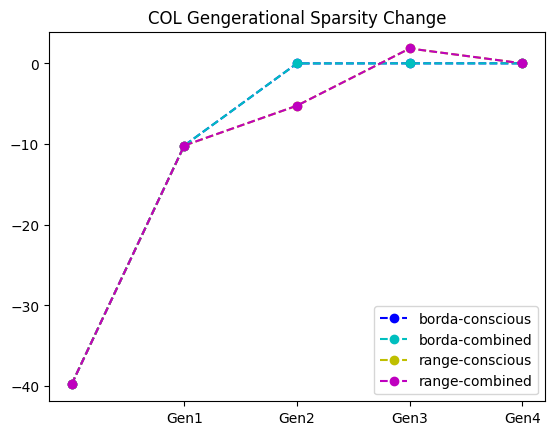

In [270]:
uncap_con_borda_spar = avg_gen_spar(UNCAPPED_CONSCIOUS_BORDA_COL)
uncap_com_borda_spar = avg_gen_spar(UNCAPPED_COMBINED_BORDA_COL)

uncap_con_range_spar = avg_gen_spar(UNCAPPED_CONSCIOUS_RANGE_COL)
uncap_com_range_spar = avg_gen_spar(UNCAPPED_COMBINED_RANGE_COL)

fig, ax = plt.subplots()
x = [0,1,2,3,4,5]
x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)

y = uncap_con_borda_spar
ax.plot(y, '--bo', label='borda-conscious')

y = uncap_com_borda_spar
ax.plot(y, '--co', label='borda-combined')

y = uncap_con_range_spar
ax.plot(y, '--yo', label='range-conscious')

y = uncap_com_range_spar
ax.plot(y, '--mo', label='range-combined')

plt.title("COL Generational Sparsity")
plt.legend()
plt.show()

uncap_con_borda_spar_diff = percentage_change(uncap_con_borda_spar)
uncap_com_borda_spar_diff = percentage_change(uncap_com_borda_spar)

uncap_con_range_spar_diff = percentage_change(uncap_con_range_spar)
uncap_com_range_spar_diff = percentage_change(uncap_com_range_spar)

fig, ax = plt.subplots()
x = [1,2,3,4,5]
x_ticks = ["Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)

y = uncap_con_borda_spar_diff
ax.plot(y, '--bo', label='borda-conscious')

y = uncap_com_borda_spar_diff
ax.plot(y, '--co', label='borda-combined')

y = uncap_con_range_spar_diff
ax.plot(y, '--yo', label='range-conscious')

y = uncap_com_range_spar_diff
ax.plot(y, '--mo', label='range-combined')

plt.title("COL Gengerational Sparsity Change")
plt.legend()
plt.show()

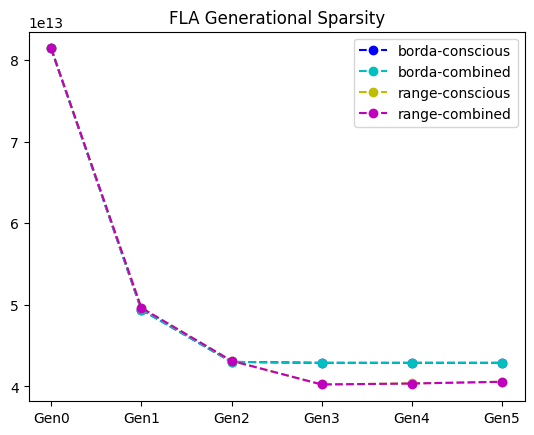

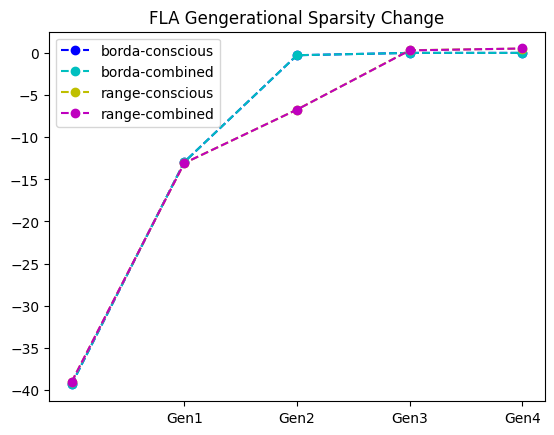

In [269]:
uncap_con_borda_spar = avg_gen_spar(UNCAPPED_CONSCIOUS_BORDA_FLA)
uncap_com_borda_spar = avg_gen_spar(UNCAPPED_COMBINED_BORDA_FLA)

uncap_con_range_spar = avg_gen_spar(UNCAPPED_CONSCIOUS_RANGE_FLA)
uncap_com_range_spar = avg_gen_spar(UNCAPPED_COMBINED_RANGE_FLA)

fig, ax = plt.subplots()
x = [0,1,2,3,4,5]
x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)

y = uncap_con_borda_spar
ax.plot(y, '--bo', label='borda-conscious')

y = uncap_com_borda_spar
ax.plot(y, '--co', label='borda-combined')

y = uncap_con_range_spar
ax.plot(y, '--yo', label='range-conscious')

y = uncap_com_range_spar
ax.plot(y, '--mo', label='range-combined')

plt.title("FLA Generational Sparsity")
plt.legend()
plt.show()


uncap_con_borda_spar_diff = percentage_change(uncap_con_borda_spar)
uncap_com_borda_spar_diff = percentage_change(uncap_com_borda_spar)

uncap_con_range_spar_diff = percentage_change(uncap_con_range_spar)
uncap_com_range_spar_diff = percentage_change(uncap_com_range_spar)

fig, ax = plt.subplots()
x = [1,2,3,4,5]
x_ticks = ["Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)

y = uncap_con_borda_spar_diff
ax.plot(y, '--bo', label='borda-conscious')

y = uncap_com_borda_spar_diff
ax.plot(y, '--co', label='borda-combined')

y = uncap_con_range_spar_diff
ax.plot(y, '--yo', label='range-conscious')

y = uncap_com_range_spar_diff
ax.plot(y, '--mo', label='range-combined')

plt.title("FLA Gengerational Sparsity Change")
plt.legend()
plt.show()

In [59]:
#
# End Sparsity
#

In [60]:
#
# Hypervolume
#

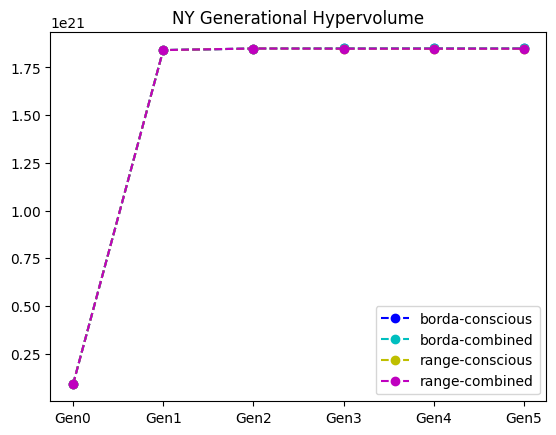

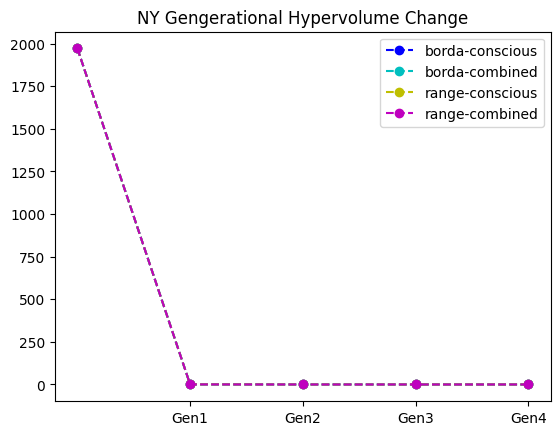

In [273]:
uncap_con_borda_hv = avg_gen_hv(UNCAPPED_CONSCIOUS_BORDA_NY)
uncap_com_borda_hv = avg_gen_hv(UNCAPPED_COMBINED_BORDA_NY)

uncap_con_range_hv = avg_gen_hv(UNCAPPED_CONSCIOUS_RANGE_NY)
uncap_com_range_hv = avg_gen_hv(UNCAPPED_COMBINED_RANGE_NY)

fig, ax = plt.subplots()
x = [0,1,2,3,4,5]
x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)

y = uncap_con_borda_hv
ax.plot(y, '--bo', label='borda-conscious')

y = uncap_com_borda_hv
ax.plot(y, '--co', label='borda-combined')

y = uncap_con_range_hv
ax.plot(y, '--yo', label='range-conscious')

y = uncap_com_range_hv
ax.plot(y, '--mo', label='range-combined')

plt.title("NY Generational Hypervolume")
plt.legend()
plt.show()


uncap_con_borda_hv_diff = percentage_change(uncap_con_borda_hv)
uncap_com_borda_hv_diff = percentage_change(uncap_com_borda_hv)

uncap_con_range_hv_diff = percentage_change(uncap_con_range_hv)
uncap_com_range_hv_diff = percentage_change(uncap_com_range_hv)

fig, ax = plt.subplots()
x = [1,2,3,4,5]
x_ticks = ["Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)

y = uncap_con_borda_hv_diff
ax.plot(y, '--bo', label='borda-conscious')

y = uncap_com_borda_hv_diff
ax.plot(y, '--co', label='borda-combined')

y = uncap_con_range_hv_diff
ax.plot(y, '--yo', label='range-conscious')

y = uncap_com_range_hv_diff
ax.plot(y, '--mo', label='range-combined')

plt.title("NY Gengerational Hypervolume Change")
plt.legend()
plt.show()


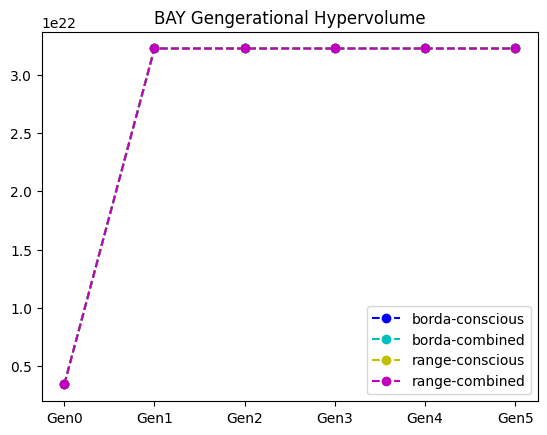

In [171]:
uncap_con_borda_spar = avg_gen_hv(UNCAPPED_CONSCIOUS_BORDA_BAY)
uncap_com_borda_spar = avg_gen_hv(UNCAPPED_COMBINED_BORDA_BAY)

uncap_con_range_spar = avg_gen_hv(UNCAPPED_CONSCIUOUS_RANGE_BAY)
uncap_com_range_spar = avg_gen_hv(UNCAPPED_COMBINED_RANGE_BAY)

fig, ax = plt.subplots()
x = [0,1,2,3,4,5]
x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)

y = uncap_con_borda_spar
ax.plot(y, '--bo', label='borda-conscious')

y = uncap_com_borda_spar
ax.plot(y, '--co', label='borda-combined')

y = uncap_con_range_spar
ax.plot(y, '--yo', label='range-conscious')

y = uncap_com_range_sparx
ax.plot(y, '--mo', label='range-combined')

plt.title("BAY Gengerational Hypervolume")
plt.legend()
plt.show()uncap_con_borda_spar = avg_gen_hv(UNCAPPED_CONSCIOUS_BORDA_COL)
uncap_com_borda_spar = avg_gen_hv(UNCAPPED_COMBINED_BORDA_COL)

uncap_con_range_spar = avg_gen_hv(UNCAPPED_CONSCIUOUS_RANGE_COL)
uncap_com_range_spar = avg_gen_hv(UNCAPPED_COMBINED_RANGE_COL)

fig, ax = plt.subplots()
x = [0,1,2,3,4,5]
x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)

y = uncap_con_borda_spar
ax.plot(y, '--bo', label='borda-conscious')

y = uncap_com_borda_spar
ax.plot(y, '--co', label='borda-combined')

y = uncap_con_range_spar
ax.plot(y, '--yo', label='range-conscious')

y = uncap_com_range_spar
ax.plot(y, '--mo', label='range-combined')

plt.title("COL Gengerational Hypervolume")
plt.legend()
plt.show()


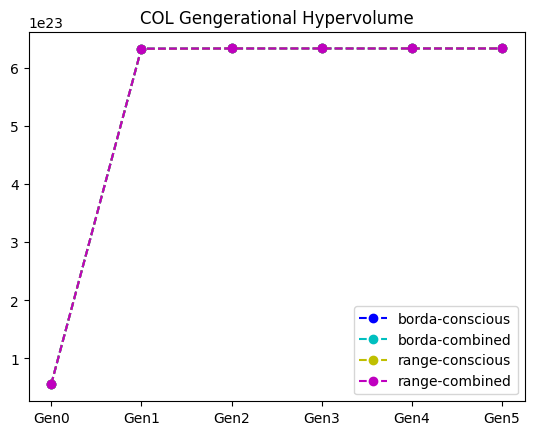

In [174]:
uncap_con_borda_spar = avg_gen_hv(UNCAPPED_CONSCIOUS_BORDA_COL)
uncap_com_borda_spar = avg_gen_hv(UNCAPPED_COMBINED_BORDA_COL)

uncap_con_range_spar = avg_gen_hv(UNCAPPED_CONSCIUOUS_RANGE_COL)
uncap_com_range_spar = avg_gen_hv(UNCAPPED_COMBINED_RANGE_COL)

fig, ax = plt.subplots()
x = [0,1,2,3,4,5]
x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)

y = uncap_con_borda_spar
ax.plot(y, '--bo', label='borda-conscious')

y = uncap_com_borda_spar
ax.plot(y, '--co', label='borda-combined')

y = uncap_con_range_spar
ax.plot(y, '--yo', label='range-conscious')

y = uncap_com_range_spar
ax.plot(y, '--mo', label='range-combined')

plt.title("COL Gengerational Hypervolume")
plt.legend()
plt.show()

In [ ]:
#
# End Hypervolumee
#

In [ ]:
#
# Fronts
#

In [76]:
def gen_front_size(df):
    gen_front_avg_size = []
    gen_front_df = df.filter(["gen0-front", "gen1-front", "gen2-front", "gen3-front", "gen4-front", "gen5-front"])
    for gen in gen_front_df:
        gen_front_size = []
        for front in gen_front_df[gen].tolist():
            gen_front_size.append(len(front))
        gen_front_avg_size.append(float(np.mean(gen_front_size)))
    return gen_front_avg_size

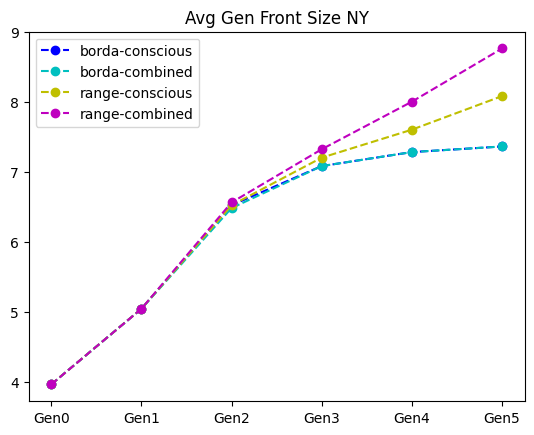

In [80]:
uncap_com_borda_fs = gen_front_size(UNCAPPED_COMBINED_BORDA_NY)
uncap_con_borda_fs = gen_front_size(UNCAPPED_CONSCIOUS_BORDA_NY)

uncap_com_range_fs = gen_front_size(UNCAPPED_COMBINED_RANGE_NY)
uncap_con_range_fs = gen_front_size(UNCAPPED_CONSCIOUS_RANGE_NY)

fig, ax = plt.subplots()
x = [0,1,2,3,4,5]
x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)

y = uncap_com_borda_fs
ax.plot(y, '--bo', label='borda-conscious')

y = uncap_con_borda_fs
ax.plot(y, '--co', label='borda-combined')

y = uncap_com_range_fs
ax.plot(y, '--yo', label='range-conscious')

y = uncap_con_range_fs
ax.plot(y, '--mo', label='range-combined')

plt.title("Avg Gen Front Size NY")
plt.legend()
plt.show()


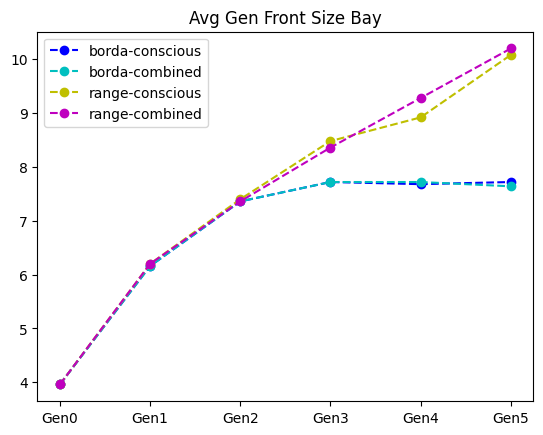

In [77]:
uncap_com_borda_fs = gen_front_size(UNCAPPED_COMBINED_BORDA_BAY)
uncap_con_borda_fs = gen_front_size(UNCAPPED_CONSCIOUS_BORDA_BAY)

uncap_com_range_fs = gen_front_size(UNCAPPED_COMBINED_RANGE_BAY)
uncap_con_range_fs = gen_front_size(UNCAPPED_CONSCIOUS_RANGE_BAY)

fig, ax = plt.subplots()
x = [0,1,2,3,4,5]
x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)

y = uncap_com_borda_fs
ax.plot(y, '--bo', label='borda-conscious')

y = uncap_con_borda_fs
ax.plot(y, '--co', label='borda-combined')

y = uncap_com_range_fs
ax.plot(y, '--yo', label='range-conscious')

y = uncap_con_range_fs
ax.plot(y, '--mo', label='range-combined')

plt.title("Avg Gen Front Size Bay")
plt.legend()
plt.show()

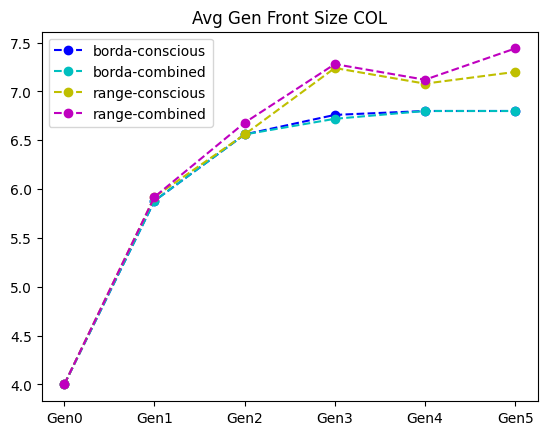

In [79]:
uncap_com_borda_fs = gen_front_size(UNCAPPED_COMBINED_BORDA_COL)
uncap_con_borda_fs = gen_front_size(UNCAPPED_CONSCIOUS_BORDA_COL)

uncap_com_range_fs = gen_front_size(UNCAPPED_COMBINED_RANGE_COL)
uncap_con_range_fs = gen_front_size(UNCAPPED_CONSCIOUS_RANGE_COL)

fig, ax = plt.subplots()
x = [0,1,2,3,4,5]
x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)

y = uncap_com_borda_fs
ax.plot(y, '--bo', label='borda-conscious')

y = uncap_con_borda_fs
ax.plot(y, '--co', label='borda-combined')

y = uncap_com_range_fs
ax.plot(y, '--yo', label='range-conscious')

y = uncap_con_range_fs
ax.plot(y, '--mo', label='range-combined')

plt.title("Avg Gen Front Size COL")
plt.legend()
plt.show()


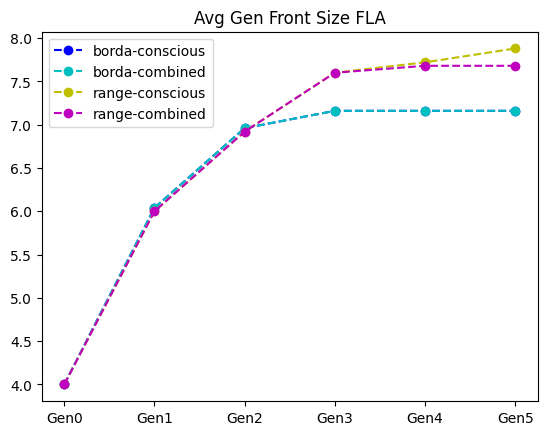

In [81]:
uncap_com_borda_fs = gen_front_size(UNCAPPED_COMBINED_BORDA_FLA)
uncap_con_borda_fs = gen_front_size(UNCAPPED_CONSCIOUS_BORDA_FLA)

uncap_com_range_fs = gen_front_size(UNCAPPED_COMBINED_RANGE_FLA)
uncap_con_range_fs = gen_front_size(UNCAPPED_CONSCIOUS_RANGE_FLA)

fig, ax = plt.subplots()
x = [0,1,2,3,4,5]
x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)

y = uncap_com_borda_fs
ax.plot(y, '--bo', label='borda-conscious')

y = uncap_con_borda_fs
ax.plot(y, '--co', label='borda-combined')

y = uncap_com_range_fs
ax.plot(y, '--yo', label='range-conscious')

y = uncap_con_range_fs
ax.plot(y, '--mo', label='range-combined')

plt.title("Avg Gen Front Size FLA")
plt.legend()
plt.show()


In [82]:
#
# END Front
#

In [83]:
#
# Time
#

In [171]:
def gen_time(df):
    gen_avg_time = []
    gen_time_df = df.filter(["gen0-time", "gen1-time", "gen2-time", "gen3-time", "gen4-time", "gen5-time"])
    for gen in gen_time_df:
        gen_times = []
        for time in gen_time_df[gen].tolist():
            gen_times.append(time)
        gen_avg_time.append(float(np.mean(gen_times)))

    running_sum = [gen_avg_time[0]]
    for i in range(1,6):
        running_sum.append(gen_avg_time[i-1] + gen_avg_time[i]) 
    return gen_avg_time, running_sum

In [172]:
uncap_com_borda_t, uncap_com_borda_rst = gen_time(UNCAPPED_COMBINED_BORDA_BAY)
uncap_con_borda_t, uncap_con_borda_rst = gen_time(UNCAPPED_CONSCIOUS_BORDA_BAY)

uncap_com_range_t, uncap_com_range_rst = gen_time(UNCAPPED_COMBINED_RANGE_BAY)
uncap_con_range_t, uncap_con_range_rst = gen_time(UNCAPPED_CONSCIOUS_RANGE_BAY)

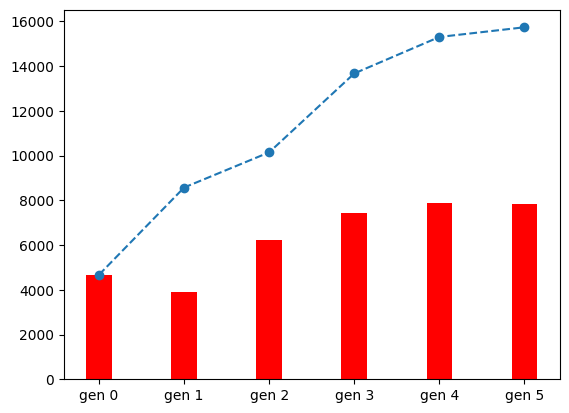

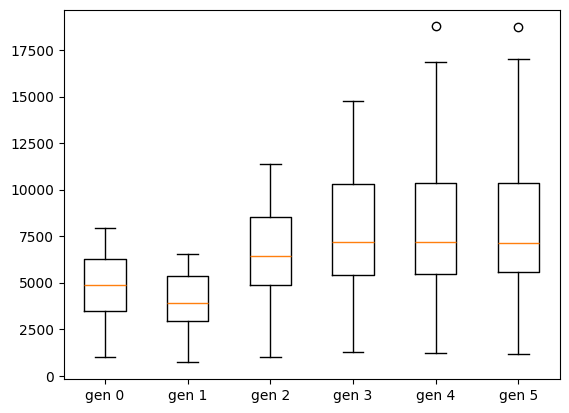

In [245]:
gen_avg, gen_avg_running = gen_time(UNCAPPED_COMBINED_BORDA_BAY)

x = [0, 1, 2, 3, 4, 5]
xticks = ["gen 0", "gen 1", "gen 2", "gen 3", "gen 4", "gen 5"]
plt.xticks(x, xticks)

plt.plot(x, gen_avg_running, "--o")
plt.bar(x, gen_avg, color = "red", width = .3)
plt.show()

runtimes = [UNCAPPED_COMBINED_BORDA_BAY["gen0-time"].tolist(), 
            UNCAPPED_COMBINED_BORDA_BAY["gen1-time"].tolist(), 
            UNCAPPED_COMBINED_BORDA_BAY["gen2-time"].tolist(),
            UNCAPPED_COMBINED_BORDA_BAY["gen3-time"].tolist(),
            UNCAPPED_COMBINED_BORDA_BAY["gen4-time"].tolist(),
            UNCAPPED_COMBINED_BORDA_BAY["gen5-time"].tolist()]
plt.boxplot(runtimes, tick_labels=xticks)
plt.show()

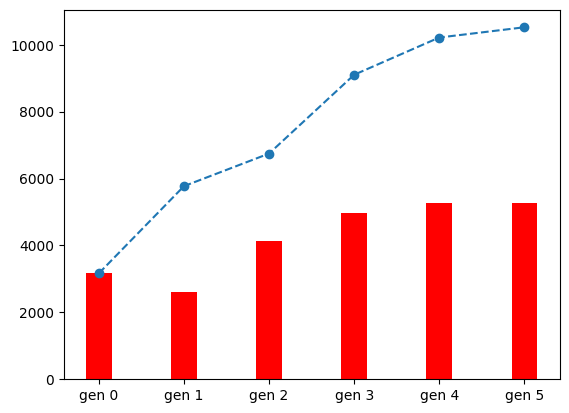

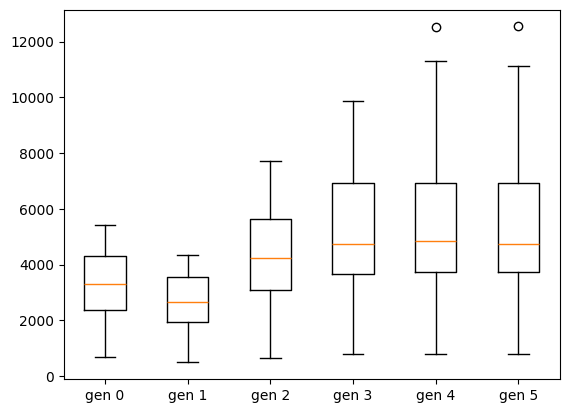

In [251]:
gen_avg, gen_avg_running = gen_time(UNCAPPED_CONSCIOUS_BORDA_BAY)

x = [0, 1, 2, 3, 4, 5]
xticks = ["gen 0", "gen 1", "gen 2", "gen 3", "gen 4", "gen 5"]
plt.xticks(x, xticks)

plt.plot(x, gen_avg_running, "--o")
plt.bar(x, gen_avg, color = "red", width = .3)
plt.show()

runtimes = [UNCAPPED_CONSCIOUS_BORDA_BAY["gen0-time"].tolist(), 
            UNCAPPED_CONSCIOUS_BORDA_BAY["gen1-time"].tolist(), 
            UNCAPPED_CONSCIOUS_BORDA_BAY["gen2-time"].tolist(),
            UNCAPPED_CONSCIOUS_BORDA_BAY["gen3-time"].tolist(),
            UNCAPPED_CONSCIOUS_BORDA_BAY["gen4-time"].tolist(),
            UNCAPPED_CONSCIOUS_BORDA_BAY["gen5-time"].tolist()]
plt.boxplot(runtimes, tick_labels=xticks)
plt.show()


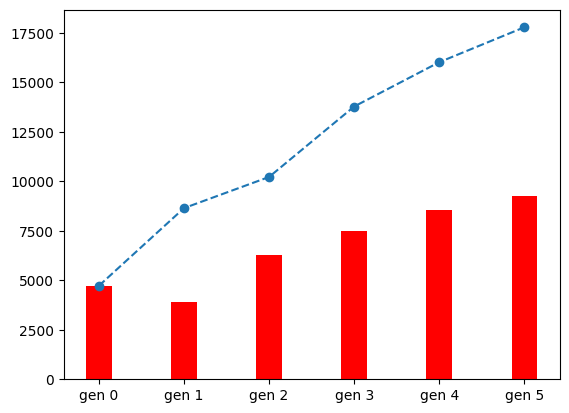

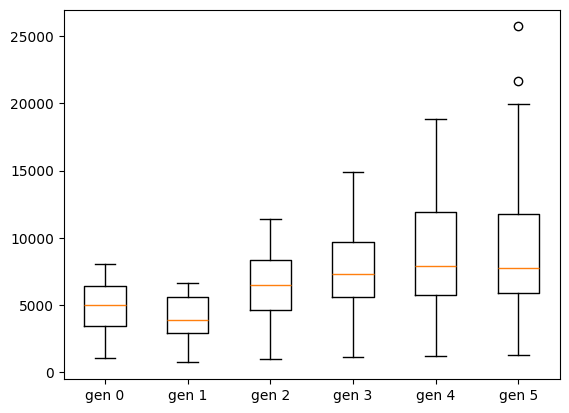

In [253]:
gen_avg, gen_avg_running = gen_time(UNCAPPED_COMBINED_RANGE_BAY)

x = [0, 1, 2, 3, 4, 5]
xticks = ["gen 0", "gen 1", "gen 2", "gen 3", "gen 4", "gen 5"]
plt.xticks(x, xticks)

plt.plot(x, gen_avg_running, "--o")
plt.bar(x, gen_avg, color = "red", width = .3)
plt.show()

runtimes = [UNCAPPED_COMBINED_RANGE_BAY["gen0-time"].tolist(), 
            UNCAPPED_COMBINED_RANGE_BAY["gen1-time"].tolist(), 
            UNCAPPED_COMBINED_RANGE_BAY["gen2-time"].tolist(),
            UNCAPPED_COMBINED_RANGE_BAY["gen3-time"].tolist(),
            UNCAPPED_COMBINED_RANGE_BAY["gen4-time"].tolist(),
            UNCAPPED_COMBINED_RANGE_BAY["gen5-time"].tolist()]
plt.boxplot(runtimes, tick_labels=xticks)
plt.show()


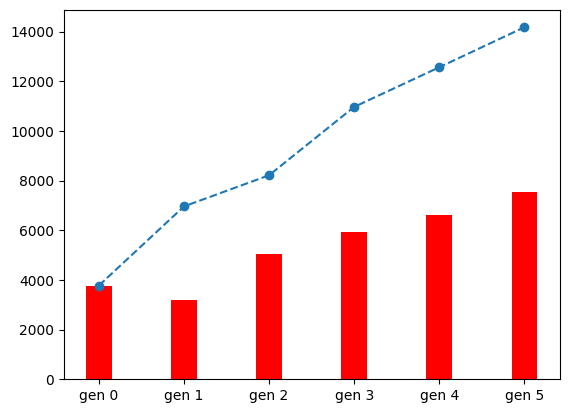

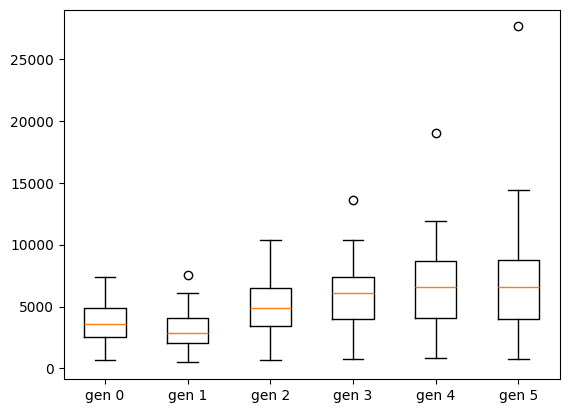

In [252]:
gen_avg, gen_avg_running = gen_time(UNCAPPED_CONSCIOUS_RANGE_BAY)

x = [0, 1, 2, 3, 4, 5]
xticks = ["gen 0", "gen 1", "gen 2", "gen 3", "gen 4", "gen 5"]
plt.xticks(x, xticks)

plt.plot(x, gen_avg_running, "--o")
plt.bar(x, gen_avg, color = "red", width = .3)
plt.show()

runtimes = [UNCAPPED_CONSCIOUS_RANGE_BAY["gen0-time"].tolist(), 
            UNCAPPED_CONSCIOUS_RANGE_BAY["gen1-time"].tolist(), 
            UNCAPPED_CONSCIOUS_RANGE_BAY["gen2-time"].tolist(),
            UNCAPPED_CONSCIOUS_RANGE_BAY["gen3-time"].tolist(),
            UNCAPPED_CONSCIOUS_RANGE_BAY["gen4-time"].tolist(),
            UNCAPPED_CONSCIOUS_RANGE_BAY["gen5-time"].tolist()]
plt.boxplot(runtimes, tick_labels=xticks)
plt.show()

In [ ]:
#
# END TIME
#

In [186]:
#
# D-Score
#

In [ ]:
#
# END D-score
#

In [ ]:
#
# Represenative Path
#

In [213]:
def avg_gen_rep_path_cost(df):
    gen_rep_avg_path_cost = []
    rep_path_df = df.filter(["gen0-raw-winner", "gen1-raw-winner", "gen2-raw-winner", "gen3-raw-winner", "gen4-raw-winner", "gen5-raw-winner"])
    for gen_rep in rep_path_df:
        gen_rep_avg_path_cost.append(np.array(rep_path_df[gen_rep].tolist()).mean(axis=0))
    return gen_rep_avg_path_cost

In [220]:
def avg_gen_norm_rep_path_cost(df):
    gen_rep_avg_path_cost = []
    rep_path_df = df.filter(["gen0-norm-winner", "gen1-norm-winner", "gen2-norm-winner", "gen3-norm-winner", "gen4-norm-winner", "gen5-norm-winner"])
    for gen_rep in rep_path_df:
        gen_rep_avg_path_cost.append(np.array(rep_path_df[gen_rep].tolist()).mean(axis=0))
    return gen_rep_avg_path_cost

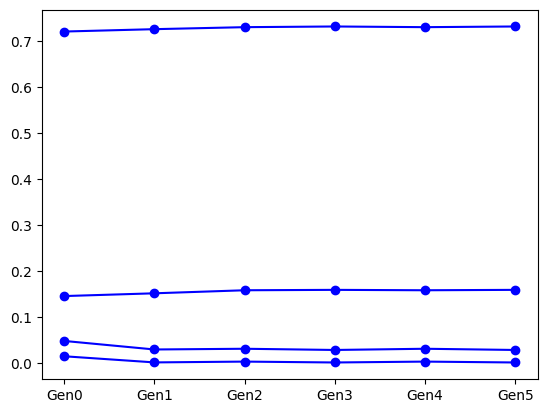

In [221]:
borda_con_avg_norm_rep = avg_gen_norm_rep_path_cost(UNCAPPED_COMBINED_BORDA_BAY)

fig, ax = plt.subplots()
x = [0,1,2,3,4,5]
x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)

y = borda_con_avg_norm_rep

ax.plot(y, '-bo', label='borda-conscious')
plt.show()